In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
"""
"Store Number": which likely serves as a unique identifier,
"AreaStore": denoting the store's physical area in square meters,
"Property": specifying whether the store is owned or rented,
"Type": classifying the store's category,
"Old/New": indicating whether the store is a new or established one,
"Checkout Number": potentially representing the number of cash registers,
"Revenue": revealing the financial performance or earnings of each store.
"""
df = pd.read_csv("data/Stores.csv")

In [3]:
df.head()

,Store Number,AreaStore,Property,Type,Old/New,Checkout Number,Revenue
0,1,2100.0,Owned,Hyper,New,6.0,"45,072,000"
1,2,1290.0,Cooperate,Extra,New,5.0,"7,416,000"
2,3,500.0,Rental,Express,New,NaN,"8,592,000"
3,4,2000.0,Owned,Hyper,New,9.0,"48,415,500"
4,5,220.0,Rental,Express,Old,2.0,"3,345,500"


In [4]:
df.drop(columns=["Store Number"], inplace=True)

In [5]:
df.head()

,AreaStore,Property,Type,Old/New,Checkout Number,Revenue
0,2100.0,Owned,Hyper,New,6.0,"45,072,000"
1,1290.0,Cooperate,Extra,New,5.0,"7,416,000"
2,500.0,Rental,Express,New,NaN,"8,592,000"
3,2000.0,Owned,Hyper,New,9.0,"48,415,500"
4,220.0,Rental,Express,Old,2.0,"3,345,500"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AreaStore        118 non-null    float64
 1   Property         118 non-null    object 
 2   Type             118 non-null    object 
 3   Old/New          118 non-null    object 
 4   Checkout Number  106 non-null    float64
 5   Revenue          118 non-null    object 
dtypes: float64(2), object(4)
memory usage: 5.7+ KB


In [7]:
df.duplicated().any()

np.False_

In [8]:
df['Property'].unique()

array(['Owned', 'Cooperate', 'Rental', 'Owned ', 'Rental ',
       'Rental/Cooperate', 'Cooperate '], dtype=object)

In [9]:
df['Property'] = df['Property'].str.strip()

In [10]:
df['Property'].unique()

array(['Owned', 'Cooperate', 'Rental', 'Rental/Cooperate'], dtype=object)

In [11]:
df["Type"].unique()

array(['Hyper', 'Extra', 'Express'], dtype=object)

In [12]:
df["Old/New"].unique()

array(['New', 'Old', 'New ', 'Old '], dtype=object)

In [13]:
df["Old/New"] = df["Old/New"].str.strip()

In [14]:
df["Old/New"].unique()

array(['New', 'Old'], dtype=object)

In [15]:
df.describe()

,AreaStore,Checkout Number
count,118.000000,106.000000
mean,1373.608136,4.792453
std,1092.453470,2.820729
min,82.000000,1.000000
25%,530.500000,3.000000
50%,1000.000000,4.000000
75%,1887.500000,6.000000
max,5600.000000,14.000000


In [16]:
df["Revenue"] = df["Revenue"].apply(lambda x: x.replace(",", '').strip() if type(x) == str else x)

# formatted = "{:,.2f}".format(45072000.0)
# print(formatted)  # Output: 45,072,000.00

In [17]:
df["Revenue"] = df['Revenue'].astype(float)

In [18]:
df.describe()

,AreaStore,Checkout Number,Revenue
count,118.000000,106.000000,1.180000e+02
mean,1373.608136,4.792453,2.299805e+07
std,1092.453470,2.820729,2.051452e+07
min,82.000000,1.000000,2.336000e+06
25%,530.500000,3.000000,9.021375e+06
50%,1000.000000,4.000000,1.358475e+07
75%,1887.500000,6.000000,3.105050e+07
max,5600.000000,14.000000,1.000830e+08


In [19]:
df.head()

,AreaStore,Property,Type,Old/New,Checkout Number,Revenue
0,2100.0,Owned,Hyper,New,6.0,45072000.0
1,1290.0,Cooperate,Extra,New,5.0,7416000.0
2,500.0,Rental,Express,New,NaN,8592000.0
3,2000.0,Owned,Hyper,New,9.0,48415500.0
4,220.0,Rental,Express,Old,2.0,3345500.0


In [20]:
property_perform = df.groupby("Property")["Revenue"].sum().reset_index().sort_values("Revenue", ascending=False)
old_new = df.groupby("Old/New")["Revenue"].sum().reset_index().sort_values("Revenue", ascending=False)
type_perform = df.groupby("Type")["Revenue"].sum().reset_index().sort_values("Revenue", ascending=False)

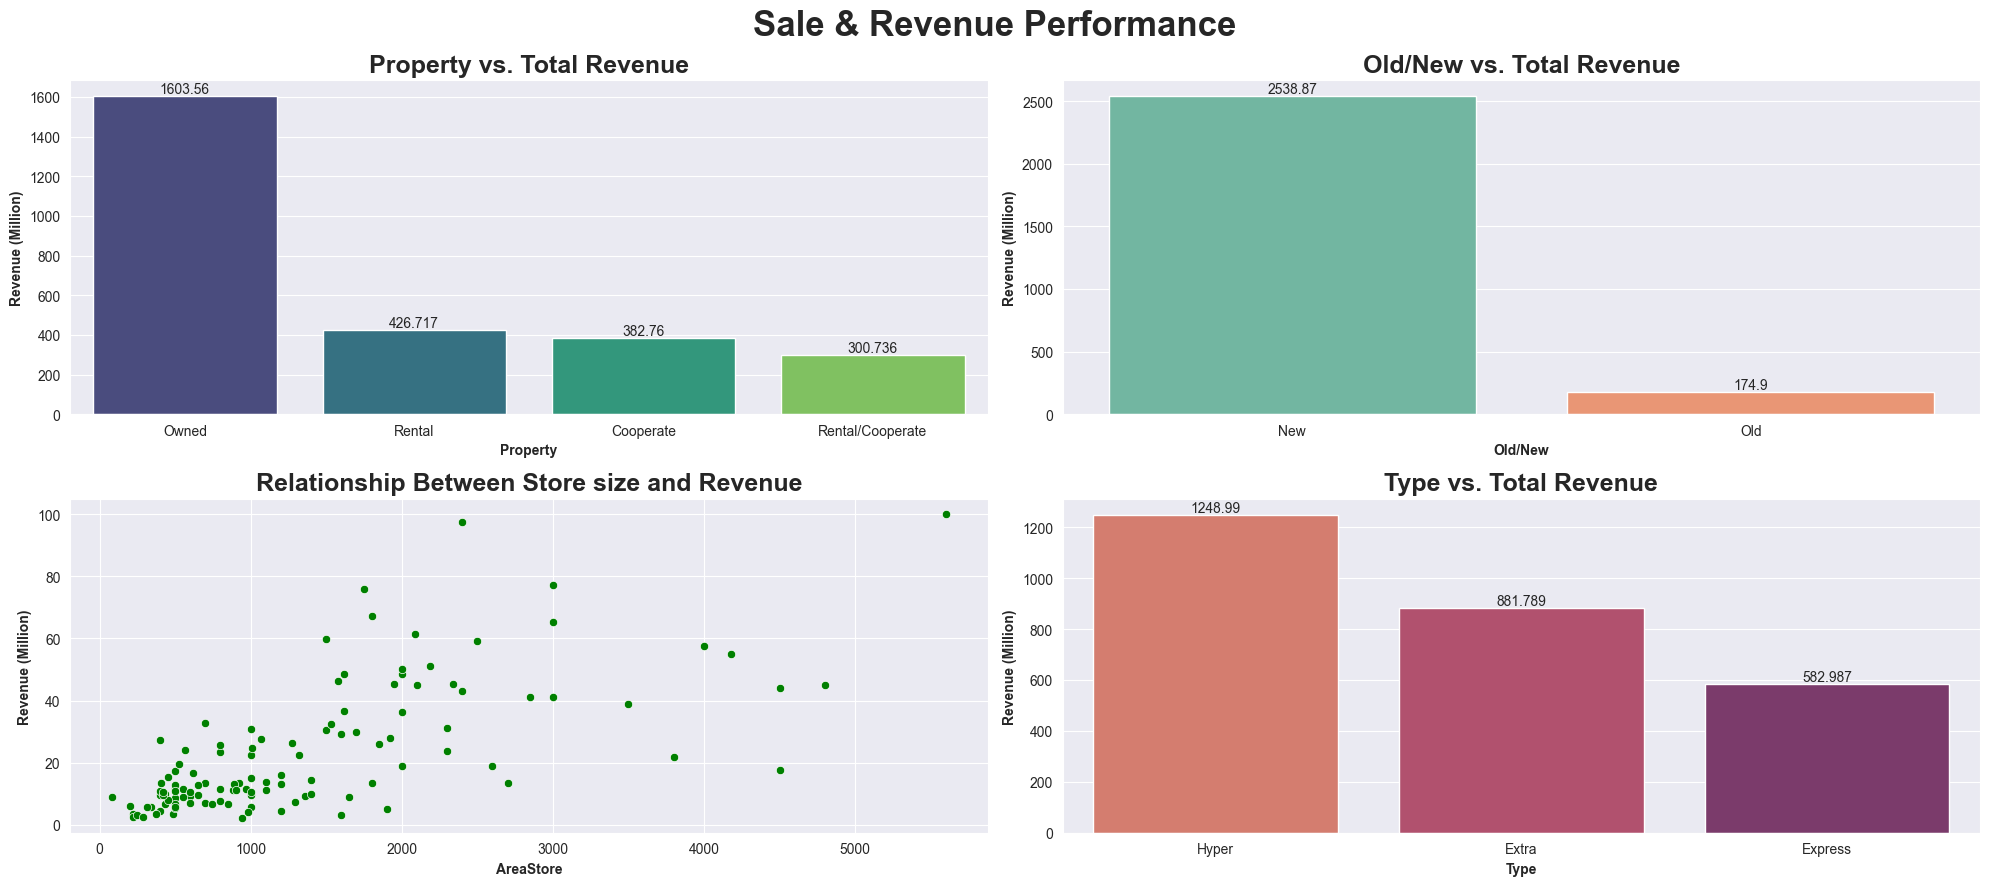

In [21]:
# ======================================Sales & Revenue Performance==============================

fig, axes = plt.subplots(2, 2, figsize=(20, 9))

# ---------------------------------------Property vs. Total Revenue-------------------------------
sns.barplot(data=property_perform, x="Property", y=property_perform["Revenue"] / 1000000, ax=axes[0, 0], hue="Property", palette='viridis')
axes[0, 0].set_title("Property vs. Total Revenue", fontweight='bold', fontsize=18)
axes[0, 0].set_xlabel("Property", fontweight='bold')
axes[0, 0].set_ylabel("Revenue (Million)", fontweight='bold')

for index in range(len(property_perform)):
    axes[0, 0].bar_label(axes[0, 0].containers[index])

# -----------------------------------Old/New vs. Total Revenue-------------------------------------
sns.barplot(data=old_new, x="Old/New", y=old_new["Revenue"] / 1000000, ax=axes[0, 1], hue="Old/New", palette="Set2")
axes[0, 1].set_title("Old/New vs. Total Revenue", fontweight='bold', fontsize=18)
axes[0, 1].set_xlabel("Old/New", fontweight='bold')
axes[0, 1].set_ylabel("Revenue (Million)", fontweight='bold')

for index in range(len(old_new)):
    axes[0, 1].bar_label(axes[0, 1].containers[index])

# -----------------------------Relationship Between store size and revenue-------------------------
sns.scatterplot(data=df, x="AreaStore", y=df["Revenue"]/1000000, ax=axes[1, 0], color='green')
axes[1, 0].set_title("Relationship Between Store size and Revenue", fontweight='bold', fontsize=18)
axes[1, 0].set_xlabel("AreaStore", fontweight='bold')
axes[1, 0].set_ylabel("Revenue (Million)", fontweight='bold')

# -------------------------------------Type vs. Total Revenue--------------------------------------
sns.barplot(data=type_perform, x="Type", y=type_perform["Revenue"]/1000000, ax=axes[1, 1], hue="Type", palette='flare')
axes[1, 1].set_title("Type vs. Total Revenue", fontweight='bold', fontsize=18)
axes[1, 1].set_xlabel("Type", fontweight='bold')
axes[1, 1].set_ylabel("Revenue (Million)", fontweight='bold')

for index in range(len(type_perform)):
    axes[1, 1].bar_label(axes[1, 1].containers[index])

fig.suptitle("Sale & Revenue Performance", fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

In [22]:
df["Revenue/Checkout"] = df["Revenue"] / df['Checkout Number']
df["Revenue/AreaStore"] = df["Revenue"] / df["AreaStore"]

In [23]:
aver_rev_checkout = df.groupby("Type")["Revenue/Checkout"].mean().reset_index().sort_values("Revenue/Checkout", ascending=False)
rev_square = df.groupby("Old/New")["Revenue/AreaStore"].mean().reset_index().sort_values("Revenue/AreaStore", ascending=False)

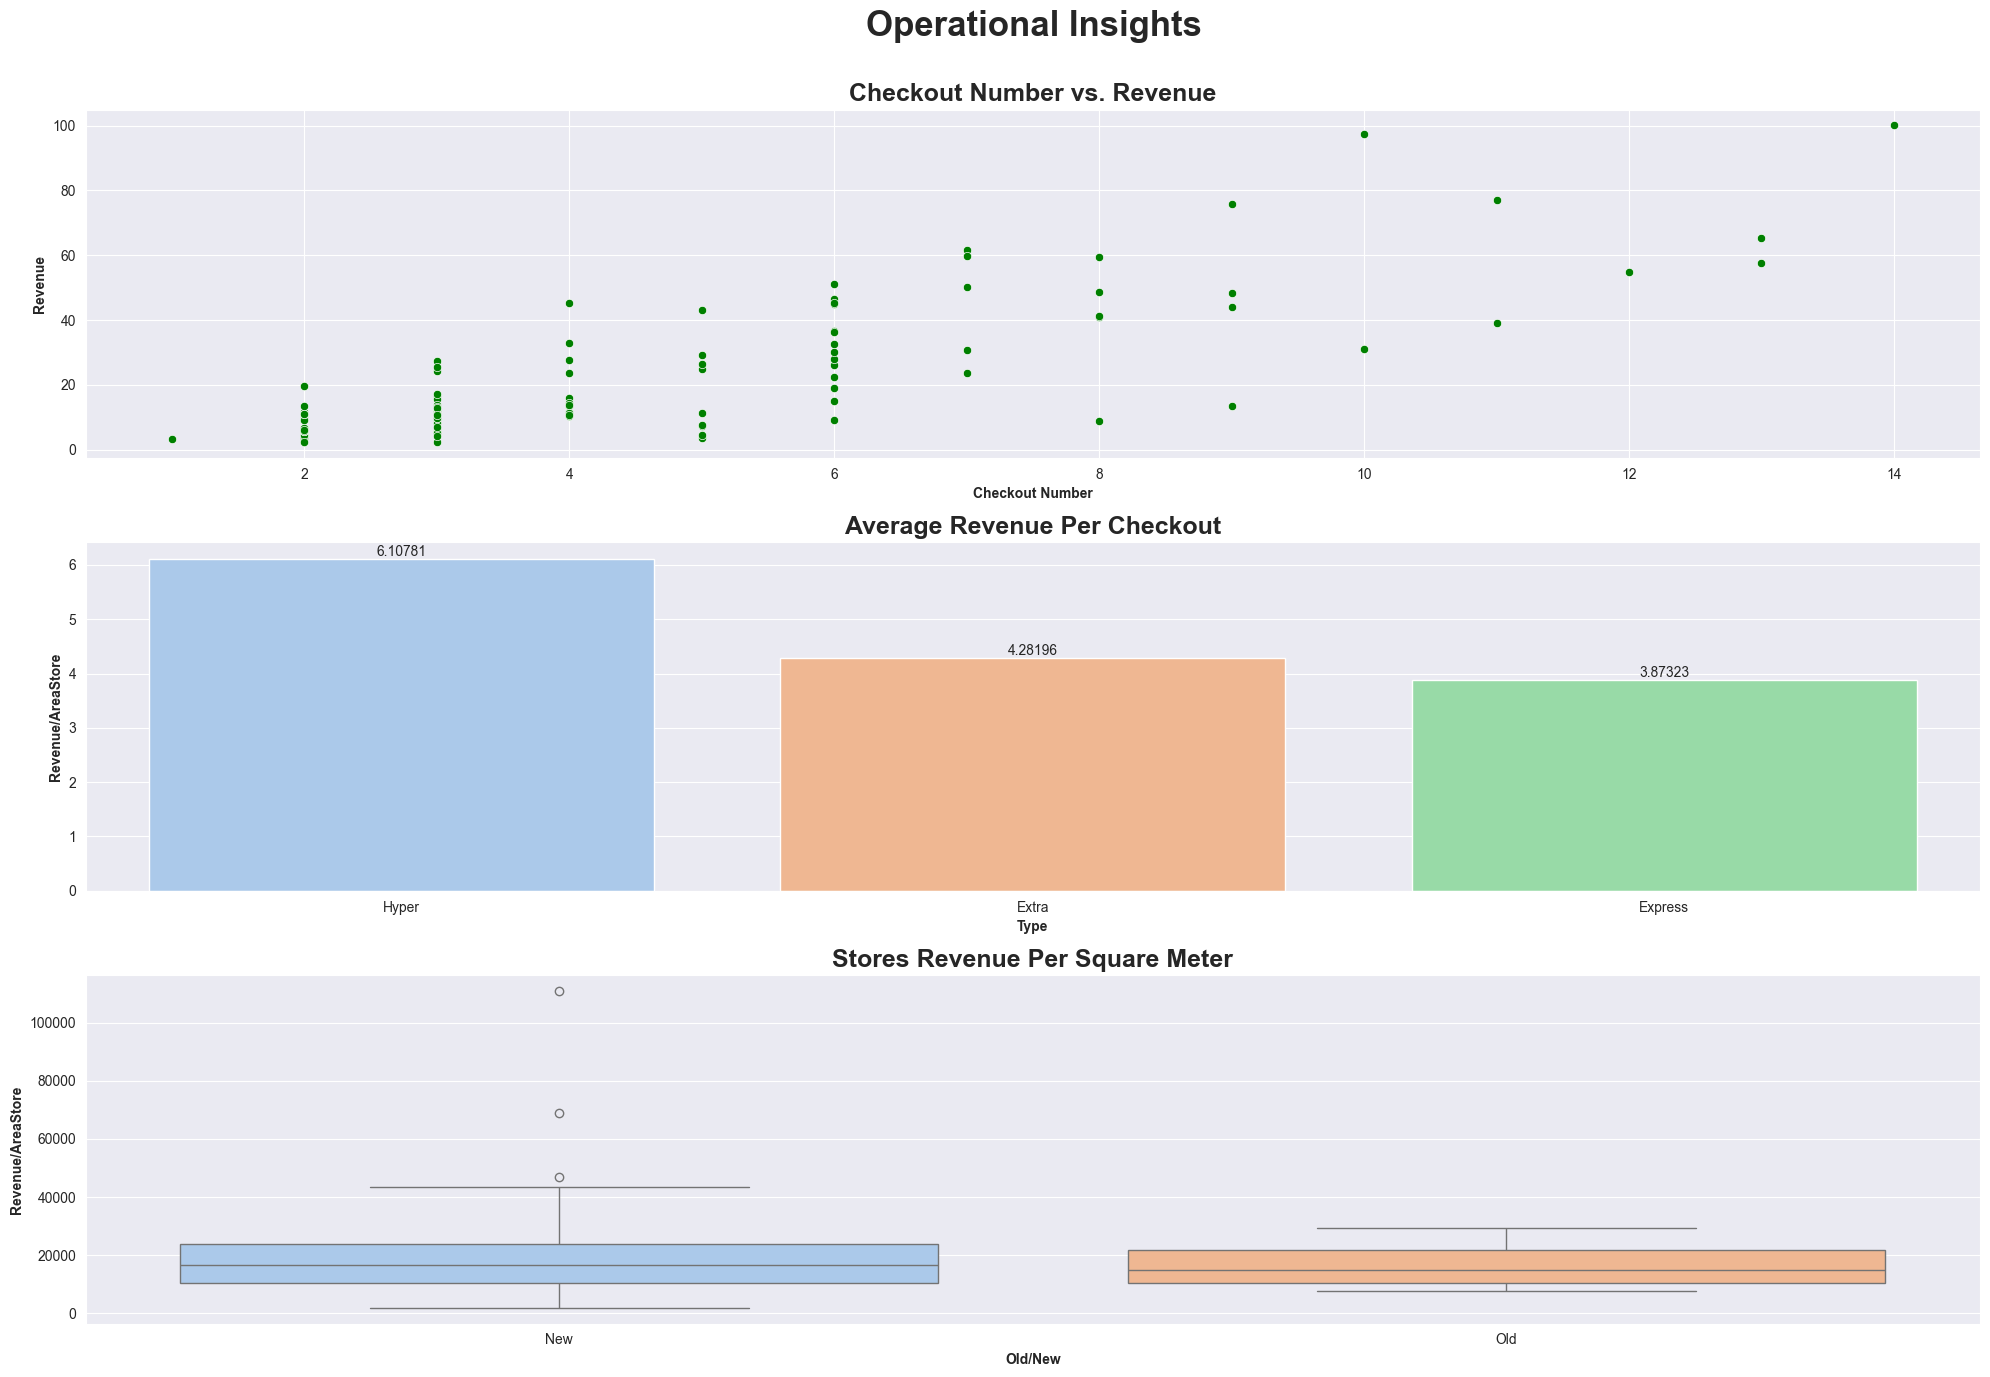

In [24]:
# Operational Insight
fig, axes = plt.subplots(3, 1, figsize=(20, 14))
sns.scatterplot(data=df, x="Checkout Number", y=df["Revenue"]/1000000, ax=axes[0], color="green")
axes[0].set_title("Checkout Number vs. Revenue", fontweight='bold', fontsize=18)
axes[0].set_xlabel("Checkout Number", fontweight='bold')
axes[0].set_ylabel("Revenue", fontweight='bold')

sns.barplot(data=aver_rev_checkout, x="Type", y=aver_rev_checkout["Revenue/Checkout"]/1000000, ax=axes[1], hue='Type', palette='pastel')
axes[1].set_title("Average Revenue Per Checkout", fontweight='bold', fontsize=18)
axes[1].set_xlabel("Type", fontweight='bold')
axes[1].set_ylabel("Revenue/AreaStore", fontweight='bold')

for index in range(len(aver_rev_checkout)):
    axes[1].bar_label(axes[1].containers[index])


sns.boxplot(data=df, x="Old/New", y="Revenue/AreaStore", ax=axes[2], hue='Old/New', palette='pastel')
axes[2].set_title("Stores Revenue Per Square Meter", fontweight='bold', fontsize=18)
axes[2].set_xlabel("Old/New", fontweight="bold")
axes[2].set_ylabel("Revenue/AreaStore", fontweight='bold')

fig.suptitle("        Operational Insights\n", fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

In [25]:
property_type = df.groupby(["Property", "Type"])["Revenue"].sum().unstack()/1000000

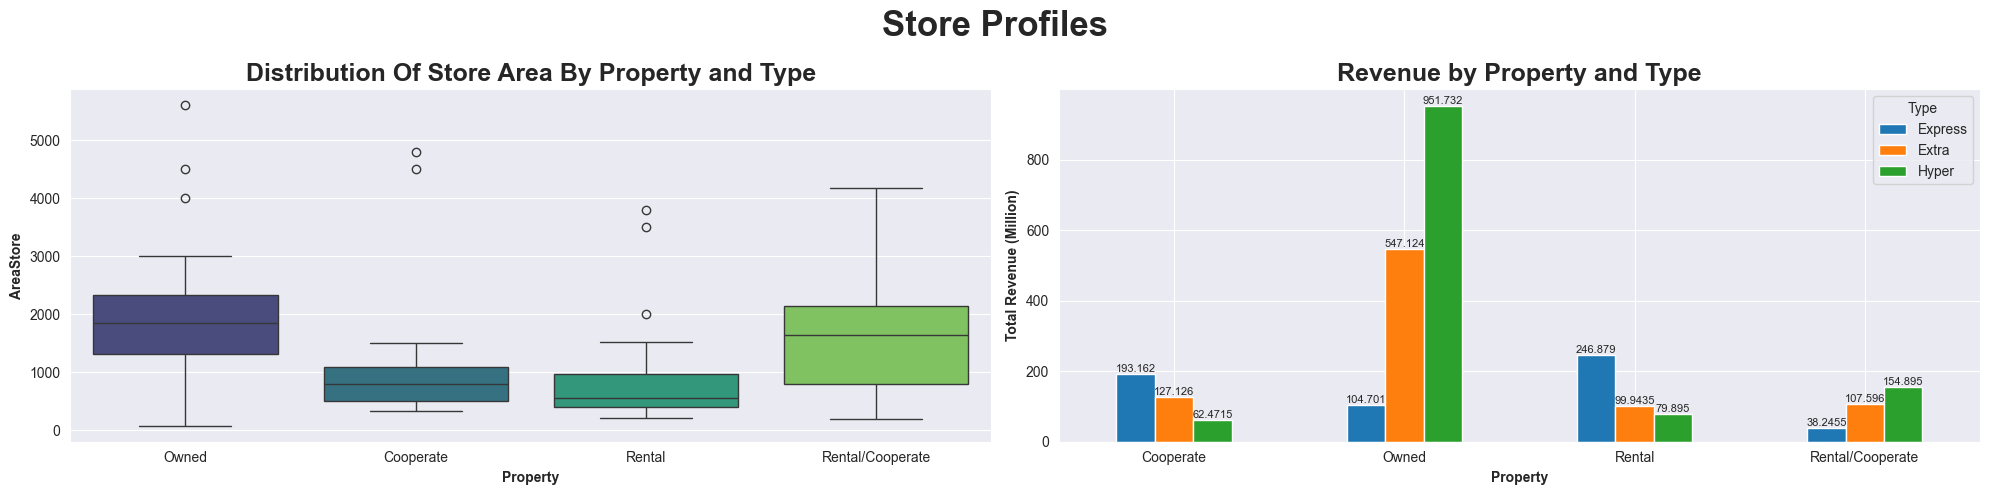

In [26]:
# Store Profiles

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
plt.xticks(rotation=90)


# -------------------------- Distribution of Store Area by Property Type --------------------------
sns.boxplot(data=df, x="Property", y="AreaStore", ax=axes[0], hue="Property", palette="viridis")
axes[0].set_title("Distribution Of Store Area By Property and Type", fontweight='bold', fontsize=18)
axes[0].set_ylabel("AreaStore", fontweight='bold')
axes[0].set_xlabel("Property", fontweight='bold')

# --------------------------- Revenue By Property and Tyupe ----------------------------------------

property_type.plot(kind="bar", ax=axes[1])
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_title("Revenue by Property and Type", fontweight='bold', fontsize=18)
axes[1].set_ylabel("Total Revenue (Million)", fontweight='bold')
axes[1].set_xlabel("Property", fontweight='bold')

for index in range(len(property_type)):
    try:
        axes[1].bar_label(axes[1].containers[index], fontsize=8)
    except:
        pass

fig.suptitle("Store Profiles", fontweight='bold', fontsize=25)
fig.tight_layout()
plt.show()

# Store Dataset Analysis Report

## Summary Insights

- **Owned properties** generate the highest revenue, totaling **1.6 Billion**.
- **New stores** significantly outperform old ones, with **2.5 Billion** in total revenue.
- **Hyper store types** lead in revenue with **1.2 Billion**, followed by Extra and Express.
- **Larger store sizes** generally produce higher revenue, peaking at **100 Million**.
- **Higher checkout numbers** correlate with increased revenue.
- **Average revenue per checkout** is highest in **Hyper** stores at **6.10 per unit**.

---

## Full Insights

### 🔹 Sale & Revenue Performance

#### • Property vs. Total Revenue
- **Owned**: 1.6 Billion  
- **Rental**: 426 Million  
- **Cooperate**: 382 Million  
- **Rental/Cooperate**: 300 Million  

#### • Old vs. New Properties
- **New properties**: 2.5 Billion  
- **Old properties**: 174 Million  

#### • Store Size vs. Revenue
- **<1000 sqm**: Mostly under 40 Million  
- **1500–3000 sqm**: Mixed — some under 40M, some over 85M  
- **3000–6000 sqm**: Fewer stores, mostly over 20M, peak at 100M  

#### • Type vs. Total Revenue
- **Hyper**: 1.2 Billion  
- **Extra**: 881 Million  
- **Express**: 582 Million  

---

### 🔹 Operational Insights

#### • Checkout Number vs. Revenue
- **Checkout <7**: Revenue under 60 Million  
- **Checkout ≥7**: Fewer stores, higher revenue  
- Only **2 stores** with 7+ checkouts are below 20M — others exceed it  
- Highest revenue: Over **70 Million**  

#### • Average Revenue per Checkout
- **Hyper**: 6.10  
- **Extra**: 4.28  
- **Express**: 3.87  

---

### 🔹 Store Profiles (by Property & Type)

#### • Cooperate Property
- **Express**: 193 Million  
- **Extra**: 127 Million  
- **Hyper**: 62 Million  

#### • Owned Property
- **Express**: 104 Million  
- **Extra**: 547 Million  
- **Hyper**: 961 Million  

#### • Rental Property
- **Express**: 246 Million  
- **Extra**: 99 Million  
- **Hyper**: 79 Million  

#### • Rental/Cooperate Property
- **Express**: 38 Million  
- **Extra**: 107 Million  
- **Hyper**: 154 Million  

---

## Key Takeaways

-  **Owned and New properties are clear top performers** — high revenue and reliable.
-  **Larger store sizes and more checkouts mean more revenue** — efficiency and scale win.
-  **Hyper stores are dominant** across all metrics — your flagship format.
-  **Property type affects store type performance** — Owned + Hyper is the powerhouse combo.
-  **Revenue per checkout** is a valuable metric — prioritize optimization per unit.

---

Report generated by Emmanuel's Data Analysis Workflow 
